In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
#Loading the dataset
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
# fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# (train_images, train_labels),
# (test_images, test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
n, x, y= x_train.shape
x_train_r=x_train.reshape((n, x*y))
n, x, y= x_test.shape
x_test_r=x_test.reshape((n, x*y))


In [0]:
store_time={}

In [5]:
x_test_r.shape

(10000, 784)

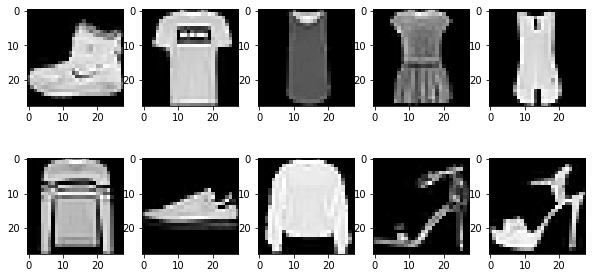

In [6]:
# Load the dataset and display representative images from each class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(zip(x_train_r[0:10],y_train[0:10])):
      plt.subplot(2,5,index+1)
      plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)

In [20]:
#Implement K-Nearest Neighbours
import time
t0 = time.time()
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_r, y_train)
run_time_knn_t = time.time() - t0
print("Time for training knn model",run_time_knn_t)


Time for training knn model 18.008251190185547


In [21]:
import time
t0 = time.time()
score = neigh.score(x_test_r,y_test)
run_time_knn_p = time.time() - t0
print("Time for training knn model",run_time_knn_p)
print(score)


Time for training knn model 962.3941662311554
0.8413


In [0]:

store_time["knn"] = [run_time_knn_t, run_time_knn_p, score ]

In [48]:
store_time

{'knn': [18.008251190185547, 962.3941662311554, 0.8413]}

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [0]:
#Logistic Regression
scaler=StandardScaler()
x_train_r = scaler.fit_transform(x_train_r)
x_test_r = scaler.transform(x_test_r)


In [27]:
import time
t0 = time.time()
logisticReg = LogisticRegression(penalty='l2',tol=0.1,solver='saga',C=0.001)
%time logisticReg.fit(x_train_r,y_train)
run_time_reg_t = time.time() - t0
print("Time for training logistic regression model",run_time_reg_t)

CPU times: user 13.3 s, sys: 7 ms, total: 13.3 s
Wall time: 13.4 s
Time for training logistic regression model 13.379379749298096


In [28]:
import time
t0 = time.time()
predictions = logisticReg.predict(x_test_r)
reg_score = logisticReg.score(x_test_r,y_test)
print(reg_score)
run_time_reg_p = time.time() - t0
print("Time for prediction using Logistic Regression:",run_time_reg_p)



0.823
Time for prediction using Logistic Regression: 0.0845484733581543


In [0]:

store_time["Logistic regression"] = [run_time_reg_t, run_time_reg_p, reg_score]

In [0]:
def plot_weights(coef):
  plt.figure(figsize=(10,5))
  scale = np.abs(coef).max()
  for i in range(10):
    l2_plot = plt.subplot(2,5,i+1)
    l2_plot.imshow(coef[i].reshape(28,28), vmin = -scale, vmax = scale, cmap=plt.cm.coolwarm)
    l2_plot.set_xlabel('Class %i' % i)
coef = logisticReg.coef_.copy()
plot_weights(coef)


In [45]:
print(time)

<module 'time' (built-in)>


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))


[[812   5  15  46  10   0 100   0  12   0]
 [  3 955   3  28   5   0   4   0   2   0]
 [ 19   5 749  10 137   1  69   0  10   0]
 [ 26  16  23 847  42   1  39   0   6   0]
 [  0   1 126  33 762   1  69   0   8   0]
 [  1   1   0   0   0 889   0  59   8  42]
 [135   1 133  35 116   0 555   0  25   0]
 [  0   0   0   0   0  33   0 938   0  29]
 [  3   1   5  10   4   3  19   5 949   1]
 [  0   0   0   0   0  10   0  43   2 945]]


In [41]:
# Support Vector Machine
from sklearn import svm
ntr = x_train.shape[0]
ntr1 = 5000
nts1 = 1000
Iperm = np.random.permutation(ntr1)
x_train_small = x_train_r[Iperm[:ntr1],:]
y_train_small = y_train[Iperm[:ntr1]]
x_test_small = x_test_r[Iperm[:nts1],:]
y_test_small = y_test[Iperm[:nts1]]

import time
t0 = time.time()
svc = svm.SVC(probability=False,kernel="linear",C=2.8,gamma=0.0073)
% time svc.fit(x_train_small,y_train_small)
# print(score)
run_time_svc_t = time.time() - t0
print("Time for training using Support Vector Machine:",run_time_svc_t)


CPU times: user 6.94 s, sys: 913 µs, total: 6.94 s
Wall time: 6.95 s
Time for training using Support Vector Machine: 6.955113649368286


In [43]:
import time
t0 = time.time()
yhat = svc.predict(x_test_small)
acc_svc = np.mean(yhat == y_test_small)
print(acc_svc)
run_time_svc_p = time.time() - t0
print("Time for prediction using Support Vector Machine:",run_time_svc_p)


0.801
Time for prediction using Support Vector Machine: 2.4201431274414062


In [0]:
store_time["SVM"] = [run_time_svc_t, run_time_svc_p, acc_svc]

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_small,yhat))


[[82  1  4  6  1  0 13  0  0  0]
 [ 1 89  0  0  0  0  0  0  0  0]
 [ 2  1 65  0 13  0 12  0  1  0]
 [ 7  4  7 82  0  0  2  0  0  0]
 [ 0  0 21  6 65  0 12  0  1  0]
 [ 0  0  0  0  0 96  0  9  0  2]
 [13  1 13  4  6  0 53  0  0  0]
 [ 0  0  0  0  0  9  0 95  0  5]
 [ 2  0  2  1  0  0  1  0 90  0]
 [ 0  0  0  0  0  3  0  4  0 93]]


(45, 784)


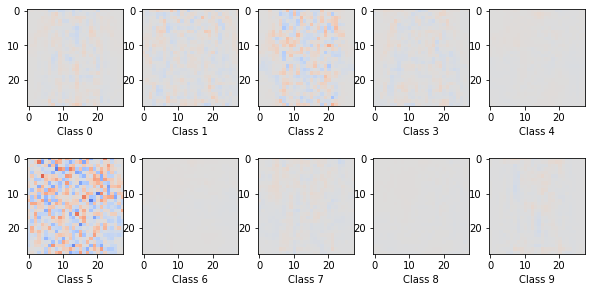

In [51]:
coef_svm = svc.coef_
plot_weights(coef_svm)
print(coef_svm.shape)

(2023, 784)


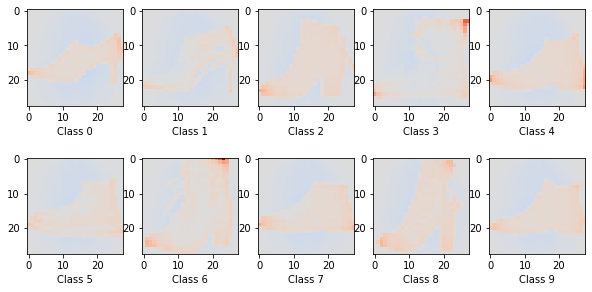

In [52]:
S = svc.support_vectors_
print(S.shape)
plot_weights(S[-10:,:])

In [53]:
print(svc.n_support_)

[235  63 271 216 268 212 356 139 161 102]


In [54]:
# Support Vector Machine Using Radial Basis Function
t0 = time.time()
svcrbf = svm.SVC(probability=False,kernel="rbf",C=5,decision_function_shape='ovo',max_iter=1000)
%time svcrbf.fit(x_train_small,y_train_small)
run_time_svm_rbf_t = time.time() - t0
print("Time for training using Support Vector Machine using rbf:",run_time_svm_rbf_t)


CPU times: user 11.3 s, sys: 2.99 ms, total: 11.3 s
Wall time: 11.3 s
Time for training using Support Vector Machine using rbf: 11.34315276145935


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [56]:
t0 = time.time()
yhat_rbf = svcrbf.predict(x_test_small)
acc_rbf = np.mean(yhat_rbf == y_test_small)
print(acc_rbf)
run_time_svm_rbf_p = time.time() - t0
print("Time for predicting using Support Vector Machine using rbf:",run_time_svm_rbf_p)

0.854
Time for predicting using Support Vector Machine using rbf: 3.425588846206665


In [0]:
store_time["svm_rbf"]=[run_time_svm_rbf_t, run_time_svm_rbf_p, acc_rbf]

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_small,yhat_rbf))



[[ 84   0   3   5   0   0  14   0   1   0]
 [  0  88   1   1   0   0   0   0   0   0]
 [  1   0  63   2  14   0  14   0   0   0]
 [  4   2   1  89   3   0   3   0   0   0]
 [  0   0  10   5  81   0   8   0   1   0]
 [  0   0   0   0   0 101   0   4   0   2]
 [ 12   0  10   5   6   0  55   0   2   0]
 [  0   0   0   0   0   7   0  98   0   4]
 [  0   0   0   0   0   0   1   0  95   0]
 [  0   0   0   0   0   1   0   5   2  92]]


In [63]:
#Table showing the method, training time, prediction time and the accuracy of each model
store_time

{'Logistic regression': [13.379379749298096, 0.0845484733581543, 0.823],
 'SVM': [6.955113649368286, 2.4201431274414062, 0.801],
 'knn': [18.008251190185547, 962.3941662311554, 0.8413],
 'svm_rbf': [11.34315276145935, 3.425588846206665, 0.854]}